# Overview
The main point of this script which is dependent on `resynthesize.py` and `signal_processing.py` is to resynthesize a a tone with quantifiable timbral features based on the harmonic distribution of an imported sound wav. 

&copy; <i>Andrew Sivaprakasam 2021</i>

In [1]:
#Formatting (to center plots):
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

# Importing Relevant Functions

In [2]:
from resynthesize import resynthesize, extract_harmonics, play_alma_mater
from signal_processing import pure_tone_complex, sound, magphase, get_spect
import matplotlib.pyplot as plt
from scipy.signal import spectrogram as sp
import numpy as np

# Generating a Simulated Tone

In [24]:
harmonics = 20;
first = 0;
dur_sec = 1;
toPlay = np.array(
    [0,1,2,3,4,5,6,7,8,9,10,11])
extract = extract_harmonics('instruments/violin_A4_normal.wav', fs = 44100, f_0 = 440, n_harms = harmonics);

fs_Hz = extract[4];
amp = extract[1][toPlay];
phase = extract[2][toPlay];
freq_Hz = extract[0][toPlay];

t_vect = np.arange(0,dur_sec*fs_Hz)/fs_Hz;
env_banj = np.exp(-9*t_vect);
env_string = (1+0.15*np.sin(6*np.pi*2*t_vect))*np.sin(.5*np.pi*2*t_vect);

tone = resynthesize(amp, 'violin_resolved.wav', fs_Hz = 44100,freq_Hz = freq_Hz, dur_sec = 1, phi = phase, 
        scale = 1, tone_shift = 1, env_fxn = env_string, type = 'sin', play_write = True, plot = False)
sound(tone, fs_Hz)

# Spectrogram of Output

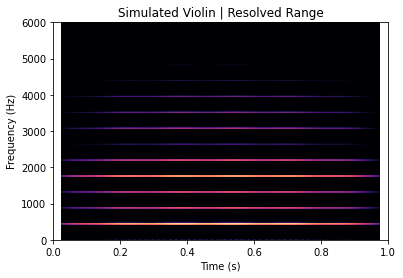

In [26]:
get_spect(tone, fs_Hz, DR = 200, BW = 75, xlim = [0,1], ylim = [0,6000], 
          colormap = 'magma',title = 'Simulated Violin | Resolved Range');

(0.3, 0.32)

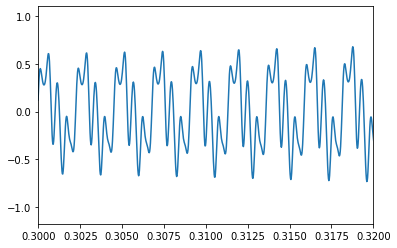

In [5]:
plt.figure()
plt.plot(t_vect, tone)
plt.xlim(0.3,0.32)